In [1]:
import tensorflow as tf
from tensorflow.models.rnn import rnn, rnn_cell
import numpy as np
%matplotlib inline
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import random
from random import randrange
from tensorflow.examples.tutorials.mnist import input_data


In [2]:
mnist =input_data.read_data_sets('MNIST_DATA', one_hot = True)
sesion = tf.InteractiveSession()

Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [3]:
simbolos= np.load('./DATA_TRAIN_IMAGES.npy')
simbolos_label =  np.load('./DATA_TRAIN_LABELS.npy')
digitos = mnist.train.images
digitos_label = mnist.train.labels
#digitos.shape
#simbolos.shape

[ 1.  0.  0.  0.]


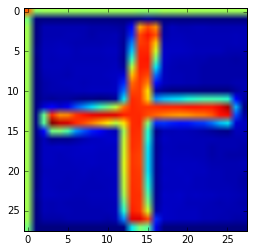

In [4]:
print (simbolos_label[3])
plt.imshow(simbolos[3])

In [5]:
idx = np.sum(simbolos_label[:,0:2],axis=1)
simbolos_label_sr = simbolos_label[idx>0,0:2]
simbolos_sr = simbolos[idx>0,:,:]
simbolos_sr.shape

(50, 28, 28)

In [6]:
# funcion 
def crearSecuencia(Dg, Et, Sm, Op, total):
    secuencia = np.zeros( (total, 3, 28,28,1) )
    resultado = np.zeros((total, 1))
    k = 0
    for k in range(total): 
        i = randrange(0, Op.shape[0]) 
        j1 = randrange(0, 55000)
        j2 = randrange(0, 55000)
        digito1 =  np.reshape(Dg[j1,:],[28,28])
        operador= Sm[i,:,:]
        digito2 =  np.reshape(Dg[j2,:],[28,28])
        secuencia [k,0,:,:,0] = digito1
        secuencia [k,1,:,:,0] = operador
        secuencia [k,2,:,:,0] = digito2
        x1 = np.argmax(Et[j1])
        x2 = np.argmax(Et[j2])
        y =  np.argmax(Op[i])
        
        if (y == 0 ):
            resultado[k]= x1 + x2 
        if (y == 1):
            resultado[k]= x1 - x2             
        
        #print (x1,Et[j1],x2,Et[j2],y,Op[i],resultado[k])    
        
    return secuencia, resultado

seq, res = crearSecuencia(digitos, digitos_label, simbolos_sr, simbolos_label_sr,  20)

Size of sequence tensor: (20, 3, 28, 28, 1)
[ 3.]


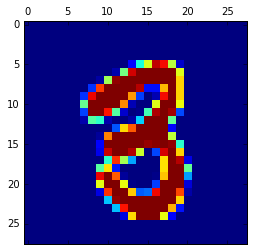

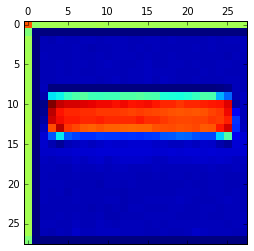

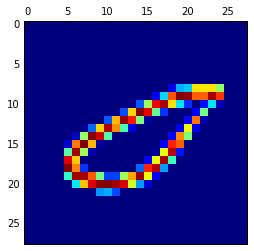

In [7]:
sid = 8
l0=seq[sid,0,:,:,0]
l1=seq[sid,1,:,:,0]
l2=seq[sid,2,:,:,0]
plt.matshow(l0)
plt.matshow(l1)
plt.matshow(l2)
print 'Size of sequence tensor:',seq.shape
print res[sid]

In [8]:
# construccion de red convolucional
# no comprendo muy bien 
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)
# no ceros valores aleatorio a una matriz truncate normal deviacion shape

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)
# todos los valores en 0.1

# solo los valores en cero empezar en cero lejano 
# incia busqu de parametros en punto aleatorio 

# maxpooling de 2x2.
#funciones de tensor
#filtros W
#entradas 
#tamño de paso strides  que tanto me muevo en las posiciones del vecrotr que entra 
#doc con2d

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
# procesamiwento de todos los canales en cada uno hace transformacion convolucionales tien un w y un b

# despuesd etener reformada la imagen 
# se activa pagtron el filtro y el pixel filtro pesos 
# remplaza por
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                         strides=[1, 2, 2, 1], padding='SAME')# COMO DEFINIO EL MAX POOLING
#solo declaraciones 

# particiones de la imagen ------------------- ????????????????????????????
# La convolución computará 32 característica para cada sector [5, 5] 
# 1 canales de entrada 
# numero de canales de salida
# tensor de peso [5, 5, 1, 32]
W_conv1 = weight_variable([5, 5, 1, 32]) # PRIMERA CONVOLUCION 
b_conv1 = bias_variable([32])

# segunda red convolucional 
#64 características para cada parche 5x5.
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

# POR QUE SE REDUCE A 7X7 LA IMAGEN???
#añadimos una capa plenamente conectado con 1024 neuronas para permitir el procesamiento en la imagen entera
#Nos remodelar el tensor de la capa de la agrupación en un lote de vectores
#se multiplica por una matriz de pesos, añadir un sesgo, y aplicar una regla.
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

def CNN(x_image):
    #para aplicar hay que modelar x a un tensor de 4d 2,3,  alto y ancho y ultimo canal de color 
    #x_image = tf.placeholder(tf.float32, shape=[None, 28, 28, 1]) # variables simbolicas para manipulacion 
    # x es un tensor  2d  punto flotante , 784 dimensiones de una unica imagen 
    # no vector se coamonadan pixeles en 2d
    #- muchas imagen pixeles, 1 canal de color
    #se aplica convoluvion a x_image, se añadeel sesgo  y se aplica relu y a esta misma el maxpooling
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # derivada
    h_pool1 = max_pool_2x2(h_conv1)
    # Operacion capa 2
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)
    # canales empiezan a tener patrones 
    #capa lineal 
    # Operacion capa 3
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    # toma todos loa  valres de la conv linelamente
    return h_fc1

#keep_prob = tf.placeholder(tf.float32)
#h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
#dropout evita malas solucions , durante entrenamiento , ignora algunos full connected, conservo % que indque la proalidad

In [9]:
learning_rate = 0.0001
training_iters = 1000
batch_size = 32
display_step = 100

In [10]:
n_input = 1024 # salida de la red convolucional y entrada a la RNN
n_steps = 3 # timesteps: tamaño de secuencias
n_hidden = 512 # hidden layer num of features || tamano de la memoria

In [11]:
# tf Graph input
x = tf.placeholder("float", [None, n_steps, 28, 28, 1])
# Tensorflow LSTM cell requires 2x n_hidden length (state & cell)
istate = tf.placeholder("float", [None, 2*n_hidden])
y = tf.placeholder("float", [None, 1])

In [12]:
# Define weights
weights = {
    'hidden': tf.Variable(tf.random_normal([n_input, n_hidden])), # Hidden layer weights
    'out': tf.Variable(tf.random_normal([n_hidden, 1]))
}
biases = {
    'hidden': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([1]))
}

In [13]:
# _X tensor de secuencias: (20,3,28,28,1)
def RNN(_X, _istate, _weights, _biases):

    # input shape: (batch_size, n_steps, 28, 28, 1)
    _X = tf.transpose(_X, [1, 0, 2, 3, 4])  # permute n_steps and batch_size
    # input shape: (n_steps=3, batch_size=20, 28, 28, 1)
    # Reshape to prepare input to hidden activation
    #_X = tf.reshape(_X, [-1, n_input]) # (n_steps*batch_size, n_input)
    # Linear activation  ==> convolutional net
    #_X = tf.matmul(_X, _weights['hidden']) + _biases['hidden']
    
    A = CNN(_X[0,:,:,:,:])
    B = CNN(_X[0,:,:,:,:])
    C = CNN(_X[0,:,:,:,:])

    # Define a lstm cell with tensorflow
    lstm_cell = rnn_cell.BasicLSTMCell(n_hidden, forget_bias=1.0)
    # Split data because rnn cell needs a list of inputs for the RNN inner loop
    #_X = tf.split(0, n_steps, _X) # n_steps * (batch_size, n_hidden)

    # Get lstm cell output
    outputs, states = rnn.rnn(lstm_cell, [A,B,C], initial_state=_istate)

    # Linear activation
    # Get inner loop last output
    return tf.matmul(outputs[-1], _weights['out']) + _biases['out']

In [14]:
pred = RNN(x, istate, weights, biases)

In [15]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.l2_loss(pred - y)) # Error cuadratico
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer

In [16]:
# Evaluate model
correct_pred = tf.equal(tf.to_int32(pred), tf.to_int32(y))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
prediccion = pred

In [17]:
# Initializing the variables
init = tf.initialize_all_variables()

In [18]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step < training_iters:
        batch_xs, batch_ys = crearSecuencia(digitos, digitos_label, simbolos, simbolos_label, batch_size)
        # Fit training using batch data
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, istate: np.zeros((batch_size, 2*n_hidden))})
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, istate: np.zeros((batch_size, 2*n_hidden))})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, istate: np.zeros((batch_size, 2*n_hidden))})
            print "Iter " + str(step*batch_size) + ", Minibatch Loss= " + "{:.6f}".format(loss) + \
                  ", Training Accuracy= " + "{:.5f}".format(acc)
        step += 1
    print "Optimization Finished!"

KeyboardInterrupt: 

In [ ]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    batch_xs, batch_ys = crearSecuencia(digitos, digitos_label, simbolos_sr, simbolos_label_sr, batch_size)
    # Calculate batch accuracy
    pred = sess.run(pred, feed_dict={x: batch_xs, y: batch_ys,
                                        istate: np.zeros((batch_size, 2*n_hidden))})
    # Calculate batch loss
    loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys,
                                     istate: np.zeros((batch_size, 2*n_hidden))})
    print batch_xs[0], batch_ys[0]
    print 'Pred',pred

In [ ]:
# no se donde se identifica el simbolo 
# para que se hacen simbolos si no se identifican 
#no comprendo donde los trato 